**TENSORFLOW INSTALLATION**

In [ ]:
pip install "tensorflow>=1.15,<2.0"

In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


**LOAD ALREADY TRAINED MOBILENET_V2 MODEL WITH ALL LAYERS INTO CLASSIFIER FROM TENSORFLOW HUB**

In [3]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
            hub.KerasLayer("http://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

**CHECKING PREDICTION RESULT BY GIVING IMAGE**

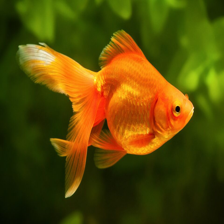

In [5]:
goldfish = Image.open("/content/sample_data/Goldfish.jpg").resize(IMAGE_SHAPE)
goldfish

In [6]:
goldfish = np.array(goldfish) / 255
goldfish

array([[[0.14509804, 0.21960784, 0.        ],
        [0.14509804, 0.21960784, 0.        ],
        [0.14509804, 0.21568627, 0.00392157],
        ...,
        [0.09411765, 0.1372549 , 0.00392157],
        [0.09411765, 0.1372549 , 0.00784314],
        [0.09019608, 0.13333333, 0.00784314]],

       [[0.14117647, 0.21568627, 0.        ],
        [0.14117647, 0.21568627, 0.        ],
        [0.14117647, 0.21176471, 0.00392157],
        ...,
        [0.09803922, 0.14117647, 0.00392157],
        [0.09411765, 0.1372549 , 0.00392157],
        [0.09019608, 0.13333333, 0.00784314]],

       [[0.14117647, 0.21568627, 0.        ],
        [0.14117647, 0.21176471, 0.00392157],
        [0.1372549 , 0.20784314, 0.00392157],
        ...,
        [0.10196078, 0.14509804, 0.00392157],
        [0.09411765, 0.1372549 , 0.00392157],
        [0.09019608, 0.13333333, 0.00392157]],

       ...,

       [[0.01960784, 0.04313725, 0.00392157],
        [0.01960784, 0.04313725, 0.00392157],
        [0.01960784, 0

In [ ]:
goldfish.shape

In [8]:
goldfish[np.newaxis,...].shape

(1, 224, 224, 3)

In [9]:
result = classifier.predict(goldfish[np.newaxis,...])
result

array([[ 0.21629429,  2.306443  , 10.451755  , ..., -1.6293399 ,
        -0.0215782 ,  0.17286126]], dtype=float32)

In [10]:
predicted_label = np.argmax(result)
predicted_label

2

In [12]:
image_label = []
with open("/content/sample_data/ImageLabels.txt",'r') as f:
  image_label = f.read().splitlines()
image_label[predicted_label]


'goldfish'

**LOAD FLOWER DATA SET FROM GOOGLE API**

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir= 'E:\Data Science\DEEP LEARNING WITH TENSORFLOW SERIES\Projects', untar=True)
data_dir

228827136/228813984 [==============================] - 1s 0us/step


'/tmp/.keras/datasets/flower_photos'

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/1788484468_f73afa6c32_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/2414954629_3708a1a04d.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/12406418663_af20dc225f_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9216324117_5fa1e2bc25_n.jpg')]

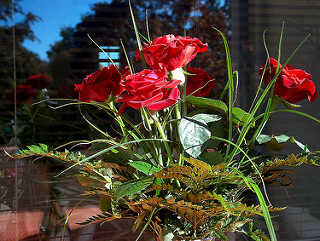

In [16]:
Image.open(str('/tmp/.keras/datasets/flower_photos/roses/1788484468_f73afa6c32_n.jpg'))

**MAKE A DICTIONARY KEY AS FLOWER TYPE AND ITEMS ARE ALL PATHS OF THAT TYPE FLOWER**

In [17]:
flower_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'tulips' :list(data_dir.glob('tulips/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflower':list(data_dir.glob('sunflower/*')),
    'daisy':list(data_dir.glob('daisy/*')) 
}

**GIVE LABELS TO FLOWER TYPES**

In [18]:
flower_label_dict = {
    'roses': 0,
    'daisy' : 1,
    'dandelion':2,
    'sunflower':3,
    'tulips':4
}

**MAKE ALL IMAGES WITH SAME SIZE**

In [19]:
x , y =[],[]

for flower_name , images in flower_images_dict.items():
  for image in images :
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,IMAGE_SHAPE)
    x.append(resized_img)
    y.append(flower_label_dict[flower_name])
    

**CONVERT THEM INTO NUMPY ARRAY**

In [20]:
x = np.array(x)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test , y_train, y_test = train_test_split(x,y,random_state=0)

**SCALE TRINING AND TESTING DATA INTO 0 TO 1.**

In [23]:
x_train_scale = x_train / 255
x_test_scaled = x_test / 255

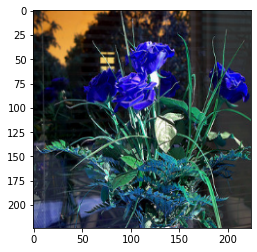

In [24]:
plt.imshow(x[0])

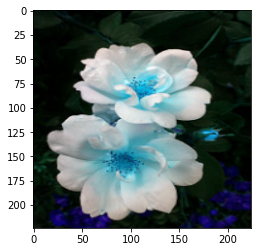

In [25]:
plt.imshow(x[1])

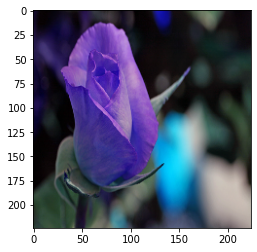

In [26]:
plt.imshow(x[2])

**CHECK PREDICTION OF ALREADY TRAINED MODEL ON FLOWER DATA**

In [27]:
result = classifier.predict(np.array([x[0],x[1],x[3]]))

In [28]:
result = np.argmax(result, axis=1 )
result

array([795, 795, 795])

In [29]:
image_label[795]

'shower curtain'

**LOAD ALREADY TRAINED MOBILENET_V2 MODEL WITHOUT LAST LAYER(SOFTMAX LAYER) AND KEEING ALL WEIGHTS OF HIDDEN LAYERS AS IT IS BY PUTING TRAINABLE=FALSE**

In [30]:
feature_extractor_model = "http://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3) , trainable=False
)

In [31]:
num_of_flower = 5
model = tf.keras.Sequential([
        pretrained_model_without_top_layer , 
        tf.keras.layers.Dense(num_of_flower)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


**FIT MODEL AND CHECK ACCURACY**

In [32]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(x_train_scale,y_train,epochs=2)

Epoch 1/2
70/70 [==============================] - 61s 816ms/step - loss: 0.6473 - accuracy: 0.7576
Epoch 2/2
70/70 [==============================] - 55s 793ms/step - loss: 0.3213 - accuracy: 0.8846


In [35]:
model.evaluate(x_test_scaled,y_test)

24/24 [==============================] - 19s 772ms/step - loss: 0.4077 - accuracy: 0.8345


[0.40769582986831665, 0.8344548940658569]